In [1054]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import matplotlib.pyplot as plt


In [1055]:
#Loading data
data = pd.read_excel("C:/Users/sh/Desktop/term 3 ut/Thesis and Paper/R/New folder/WWTP_data.xlsx")

for var in data:
    data[var] = data[var].replace(np.nan, data[var].mean())
    

# 'Q_in','Temp_in','pH_in', 'COD_in', 'BOD_in', 'TSS_in', 'NH4_in', 'TN_in', 'PO4_in', 'TP_in', 
# 'MLSS_AT', 'DO_AT' ,'MLSS_re' ,'Temp_air'


xtrain = data[['Q_in','Temp_in','pH_in', 'COD_in', 'BOD_in', 'TSS_in', 'NH4_in', 'TN_in', 'PO4_in', 'TP_in', 
               'MLSS_AT', 'DO_AT' ,'MLSS_re' ,'Temp_air']].to_numpy()

var = 'BOD_eff'
ytrain = data[[var]].to_numpy()

In [1056]:
# Normalize Data
X = MinMaxScaler().fit_transform(xtrain)
Y = MinMaxScaler().fit_transform(ytrain)



if var=='Q_eff':
    n_components = 6
elif var=='Temp_eff':
    n_components = 5
elif var=='pH_eff':
    n_components = 6
elif var=='COD_eff':
    n_components = 6
elif var=='BOD_eff':
    n_components = 6
elif var=='TSS_eff':
    n_components = 9
elif var=='NH4_eff':
    n_components = 6
elif var=='TN_eff':
    n_components = 6
elif var=='PO4_eff':
    n_components = 6
elif var=='TP_eff':
    n_components = 6
elif var=='FC_eff':
    n_components = 6




# pca = PCA(n_components=n_components)
# X = pca.fit_transform(X)

In [1057]:
# splitting data to train and test
trn_tst_split = int(0.8*len(X))
X_train = X[0:trn_tst_split]
Y_train = Y[0:trn_tst_split]
X_test = X[trn_tst_split:]
Y_test = Y[trn_tst_split:]

In [1058]:
mlp = MLPRegressor(hidden_layer_sizes=(3), activation= 'tanh',
                   solver='sgd', batch_size=5, learning_rate='adaptive',
                   learning_rate_init=0.15, max_iter=3000, shuffle=True,
                   tol=0.0000000000000000001, verbose=True, momentum=0.9, alpha=0.0001,
                   warm_start=True, validation_fraction=0.1)

mlp.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.01085293
Iteration 2, loss = 0.01002136
Iteration 3, loss = 0.00943210
Iteration 4, loss = 0.00942584
Iteration 5, loss = 0.00972152
Iteration 6, loss = 0.00907316
Iteration 7, loss = 0.00935255
Iteration 8, loss = 0.00889550
Iteration 9, loss = 0.00831385
Iteration 10, loss = 0.00846911
Iteration 11, loss = 0.00892874
Iteration 12, loss = 0.00832480
Iteration 13, loss = 0.00813119
Iteration 14, loss = 0.00829599
Iteration 15, loss = 0.00824391
Iteration 16, loss = 0.00824912
Iteration 17, loss = 0.00850079
Iteration 18, loss = 0.00797013
Iteration 19, loss = 0.00799962
Iteration 20, loss = 0.00775114
Iteration 21, loss = 0.00793536
Iteration 22, loss = 0.00792331
Iteration 23, loss = 0.00797481
Iteration 24, loss = 0.00799705
Iteration 25, loss = 0.00788455
Iteration 26, loss = 0.00801327
Iteration 27, loss = 0.00809120
Iteration 28, loss = 0.00795657
Iteration 29, loss = 0.00791501
Iteration 30, loss = 0.00770134
Iteration 31, loss = 0.00759335
Iteration 32, los

Iteration 231, loss = 0.00668494
Iteration 232, loss = 0.00668494
Iteration 233, loss = 0.00668494
Iteration 234, loss = 0.00668494
Iteration 235, loss = 0.00668494
Iteration 236, loss = 0.00668494
Iteration 237, loss = 0.00668494
Iteration 238, loss = 0.00668494
Iteration 239, loss = 0.00668494
Iteration 240, loss = 0.00668494
Iteration 241, loss = 0.00668495
Iteration 242, loss = 0.00668494
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Learning rate too small. Stopping.


MLPRegressor(activation='tanh', batch_size=5, hidden_layer_sizes=3,
             learning_rate='adaptive', learning_rate_init=0.15, max_iter=3000,
             solver='sgd', tol=1e-19, verbose=True, warm_start=True)

In [1059]:
train_pred = mlp.predict(X_train)
test_pred = mlp.predict(X_test)

In [1060]:
R2_train = metrics.r2_score(Y_train, train_pred)
print(); print('Train:'); print('R2:'); print(np.sqrt(R2_train))

# another R2

MSE_train = metrics.mean_squared_error(Y_train, train_pred)
print('MSE:'); print(MSE_train)

R2_test = metrics.r2_score(Y_test, test_pred)
print(); print('Test:'); print('R2:'); print(np.sqrt(R2_test))

MSE_test = metrics.mean_squared_error(Y_test, test_pred)
print('MSE:'); print(MSE_test); print()


Train:
R2:
0.49642030156595524
MSE:
0.01320694371999092

Test:
R2:
0.6090262663035472
MSE:
0.0085965469341255



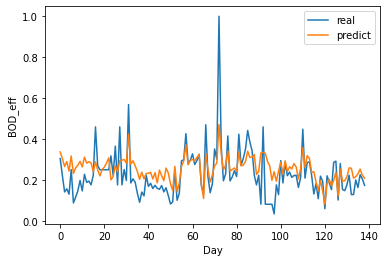

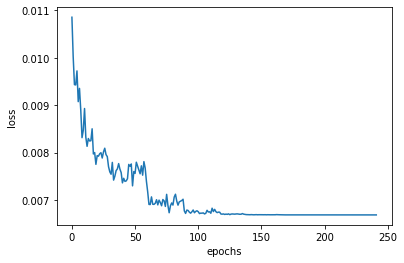

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


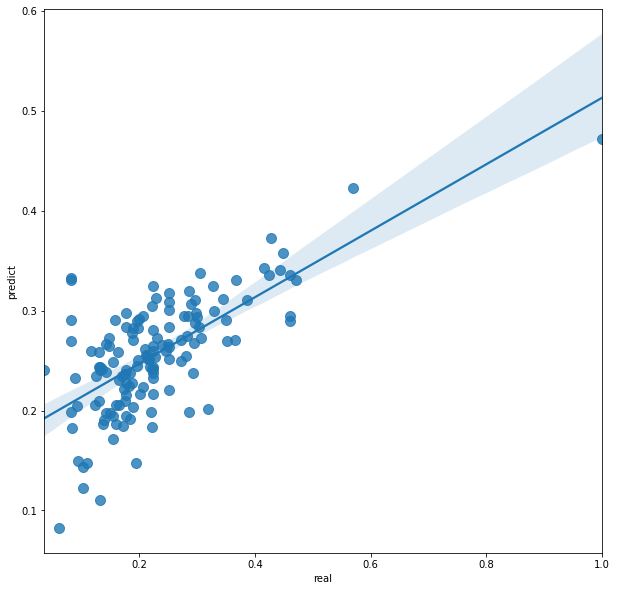

In [1061]:
plt.plot(Y_test, label= 'real')
plt.plot(test_pred, label='predict')
plt.legend()
plt.xlabel('Day')
plt.ylabel(var)
plt.show()

loss = mlp.loss_curve_
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.figure(figsize=(10,10))     
sns.regplot(Y_test, test_pred, fit_reg=True, scatter_kws={"s": 100})
plt.xlabel('real')
plt.ylabel('predict')
plt.show()